## Libs

In [121]:
import pandas as pd
import seaborn as srn
import statistics as sts

## DATABASE

In [122]:
data = pd.read_csv('Churn.csv', sep=';')
data.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [123]:
data.shape

(999, 12)

## Nomeando Colunas

In [124]:
data.columns = [
    'id', 'score', 'estado', 'genero', 'idade', 'patrimonio', 'saldo',
    'produtos', 'temcardcredito', 'ativo', 'salario', 'saiu'
]
data.tail()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
998,1000,811,PR,Feminino,28,4,16773882,2,1,1,990342.0,0


## Valores Nulos

In [125]:
data.isnull().sum()

id                0
score             0
estado            0
genero            8
idade             0
patrimonio        0
saldo             0
produtos          0
temcardcredito    0
ativo             0
salario           7
saiu              0
dtype: int64

## Dados Duplicados

In [126]:
data[data.duplicated(['id'], keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [127]:
data.drop_duplicates(subset='id', keep='first', inplace=True)
data[data.duplicated(['id'], keep=False)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu


## Agrupando e Tratando Dados
## Dados Categóricos

### Estados

In [128]:
estados = data.groupby(['estado']).size()
estados

estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='estado'>

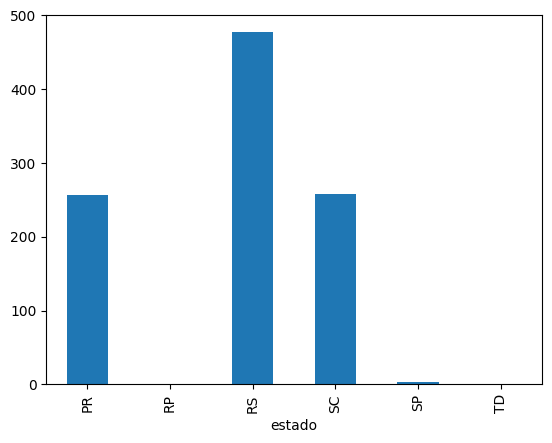

In [129]:
estados.plot.bar()

In [130]:
data.loc[data['estado'].isin(['RP', 'SP', 'TD']), 'estado'] = 'RS'
data.groupby(data['estado']).size()

estado
PR    257
RS    483
SC    258
dtype: int64

### Generos

In [131]:
generos = data.groupby(['genero']).size()
generos

genero
F              2
Fem            1
Feminino     460
M              6
Masculino    521
dtype: int64

<Axes: xlabel='genero'>

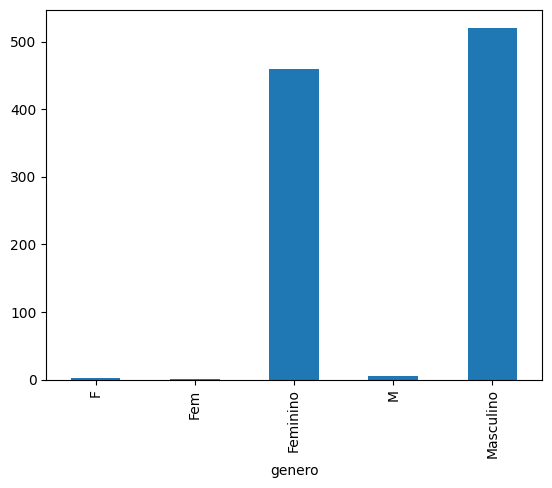

In [132]:
generos.plot.bar()

In [133]:
data['genero'].fillna('Masculino', inplace=True)
data.isnull().sum()

id                0
score             0
estado            0
genero            0
idade             0
patrimonio        0
saldo             0
produtos          0
temcardcredito    0
ativo             0
salario           7
saiu              0
dtype: int64

In [134]:
data.loc[data['genero'] == 'M', 'genero'] = 'Masculino'
data.loc[data['genero'].isin(['F', 'Fem']), 'genero'] = 'Feminino'
data.groupby(data['genero']).size()

genero
Feminino     463
Masculino    535
dtype: int64

## Dados Numéricos

### Score

In [135]:
data['score'].describe()

count    998.000000
mean     648.605210
std       98.312117
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Scores')

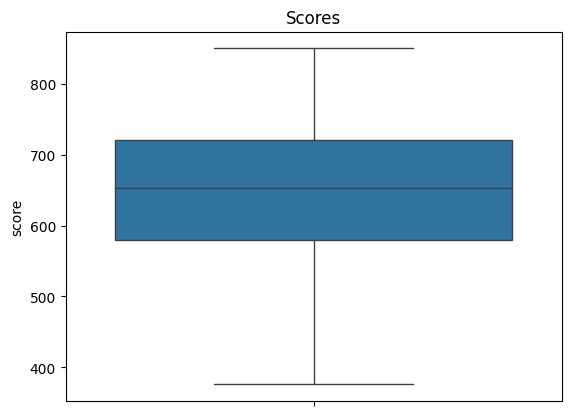

In [136]:
srn.boxplot(data['score']).set_title('Scores')

/tmp/ipykernel_4893/497657648.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(data['score']).set_title('Scores')


Text(0.5, 1.0, 'Scores')

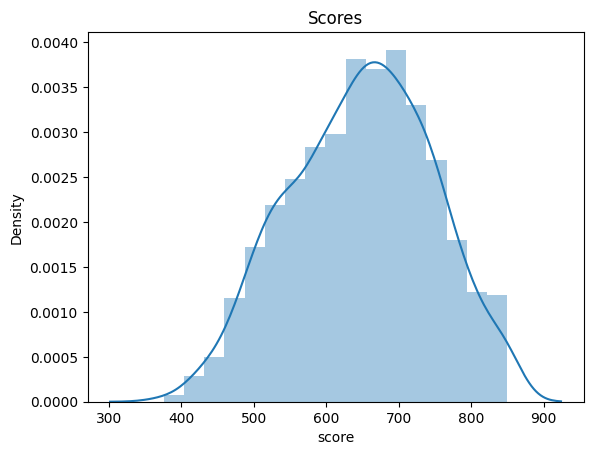

In [137]:
srn.distplot(data['score']).set_title('Scores')

### Idades

In [138]:
data['idade'].describe()

count    998.000000
mean      38.907816
std       11.406570
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

Text(0.5, 1.0, 'Idades')

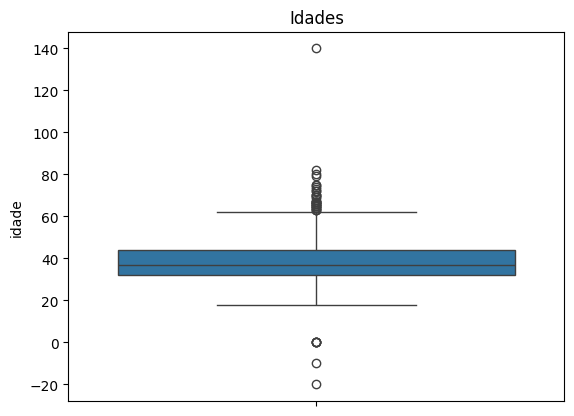

In [139]:
srn.boxplot(data['idade']).set_title('Idades')

/tmp/ipykernel_4893/4207858019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(data['idade']).set_title('Idades')


Text(0.5, 1.0, 'Idades')

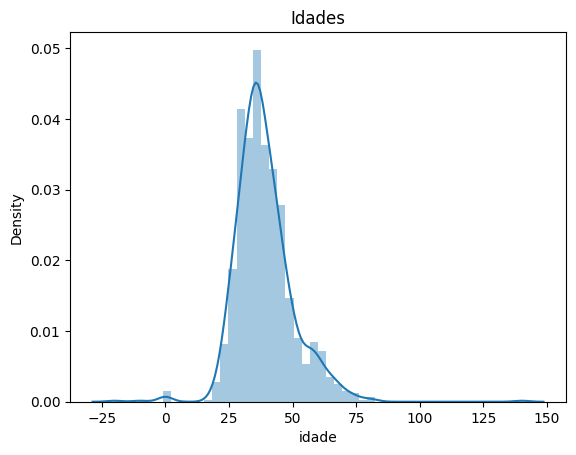

In [140]:
srn.distplot(data['idade']).set_title('Idades')

In [141]:
data.loc[(data['idade'] < 0) | (data['idade'] > 120)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [142]:
mediana_idade = sts.median(data['idade'])
mediana_idade

37.0

In [143]:
data.loc[(data['idade'] < 0) | (data['idade'] > 120), 'idade'] = mediana_idade
data['idade'].describe()

count    998.000000
mean      38.908818
std       10.676642
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: idade, dtype: float64

<Axes: ylabel='idade'>

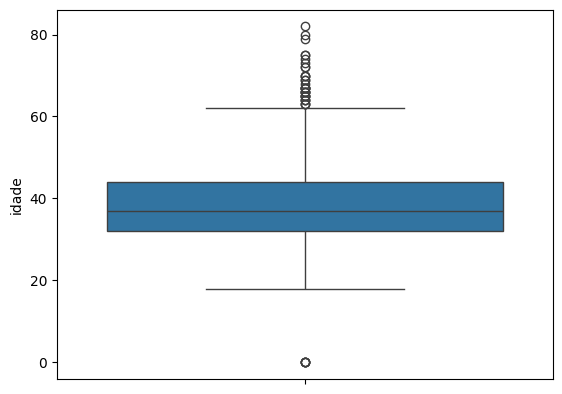

In [144]:
srn.boxplot(data['idade'])

### Saldos

In [145]:
data['saldo'].describe()

count    9.980000e+02
mean     7.162423e+06
std      6.314508e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.926348e+06
75%      1.258767e+07
max      2.117743e+07
Name: saldo, dtype: float64

Text(0.5, 1.0, 'Saldos')

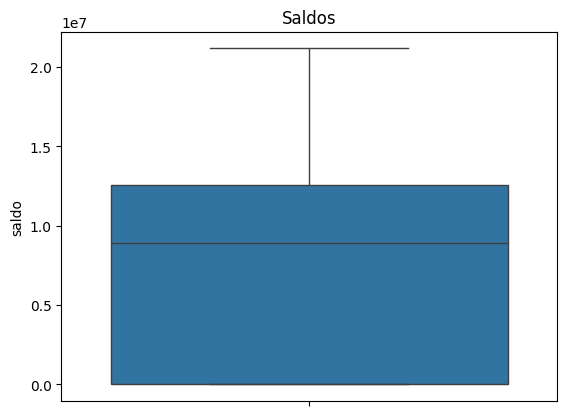

In [146]:
srn.boxplot(data['saldo']).set_title('Saldos')

/tmp/ipykernel_4893/352996391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(data['saldo']).set_title('Saldos')


Text(0.5, 1.0, 'Saldos')

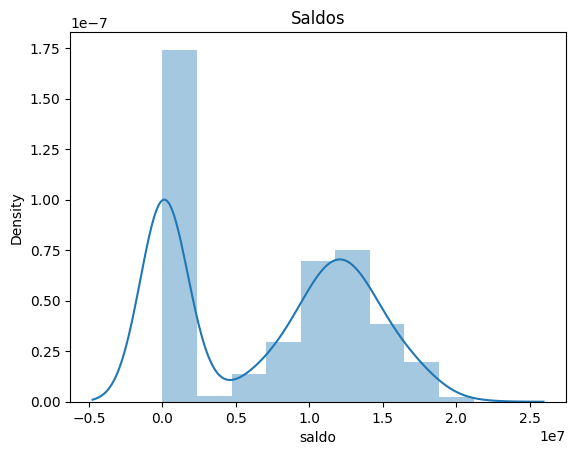

In [147]:
srn.distplot(data['saldo']).set_title('Saldos')

### Salarios

In [148]:
data['salario'].describe()

count    9.910000e+02
mean     3.530593e+07
std      5.308476e+08
min      9.677000e+03
25%      3.020010e+06
50%      8.695742e+06
75%      1.404604e+07
max      1.193469e+10
Name: salario, dtype: float64

Text(0.5, 1.0, 'Salarios')

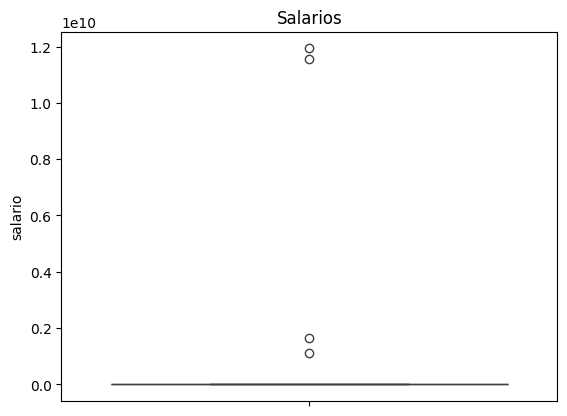

In [149]:
srn.boxplot(data['salario']).set_title('Salarios')

/tmp/ipykernel_4893/472077938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(data['salario']).set_title('Salarios')


Text(0.5, 1.0, 'Salarios')

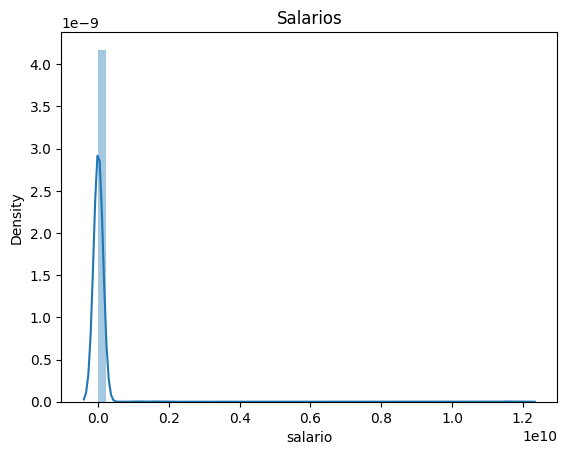

In [150]:
srn.distplot(data['salario']).set_title('Salarios')

In [151]:
mediana_salario = sts.median(data['salario'])
mediana_salario

73752.0

In [152]:
data['salario'].fillna(mediana_salario, inplace=True)
data.isnull().sum()

id                0
score             0
estado            0
genero            0
idade             0
patrimonio        0
saldo             0
produtos          0
temcardcredito    0
ativo             0
salario           0
saiu              0
dtype: int64

In [153]:
desvio_salario = sts.stdev(data['salario'])
desvio_salario

528988916.9661659

In [154]:
data.loc[data['salario'] >= 2 * desvio_salario]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


<Axes: ylabel='salario'>

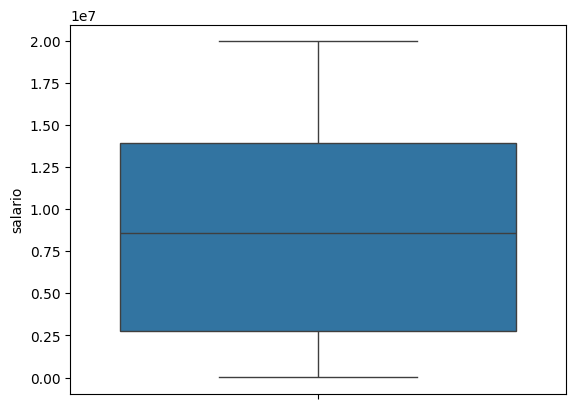

In [155]:
data.loc[data['salario'] >= 2 * desvio_salario, 'salario'] = mediana_salario
srn.boxplot(data['salario'])

## Dados Tratados

In [157]:
data.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [156]:
data.shape

(998, 12)